<a href="https://colab.research.google.com/github/bluecityisu/class2022/blob/main/lstm_reg5_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.12.0


In [ ]:
url='/content/drive/MyDrive/python_bank/reg/smonth.xlsx'
data = pd.read_excel(url)
fn=[]
final=[]
final2=[]
accy=[]
data.tail()

,t,ss,s1609,s3529,s2352,s3704
40,2023-05-31,0.625565,1.038060,0.949198,1.632821,1.436839
41,2023-06-30,0.773135,1.990836,1.543149,2.095250,1.644775
42,2023-07-31,0.873641,1.870151,0.973277,2.570011,2.424535
43,2023-08-31,0.650271,1.781225,0.909066,1.965770,1.738346
44,2023-09-28,0.527520,1.971780,1.230121,1.941107,2.008663


In [ ]:
model = Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,input_shape=[1,],return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  Dense(64, activation='relu'),
  Dense(128, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])
model.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
ss=data.pop('ss')
loop=len(data.columns)-1
for i in range(loop):
  fn.append(data.columns[i+1])
loop

4

In [ ]:
for i in range(loop):
  target=data[data.columns[i+1]]
  newset=pd.DataFrame(target)

  #newset.insert(1,"s2",0)
  #newset["s2"]=newset[newset.columns[0]]-ss
  newset.insert(1,"s2",0)
  for j in range(len(newset)-1):#
    newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#
  newset=newset.drop(newset.index[0],axis=0)#

  newset=newset.drop(newset.index[-1],axis=0)
  ss1=ss.drop(ss.index[0],axis=0)
  ss1=ss1.drop(ss1.index[0],axis=0) #
  data2 = pd.concat([ss1, newset], axis=1, join='inner')
  train_dataset = data2[0:30]
  test_dataset = data2.drop(train_dataset.index)
  train_features = train_dataset.copy()
  test_features = test_dataset.copy()

  train_labels = train_features.pop('ss')
  test_labels = test_features.pop('ss')

  train_features=np.expand_dims(train_features,-1)
  test_features=np.expand_dims(test_features,-1)
  history = model.fit(train_features, train_labels, epochs=1000)
  hist = pd.DataFrame(history.history)
  re=np.array(hist)
  final.append(re[-1,0])
  test_results = {}
  test_results['model'] = model.evaluate(test_features, test_labels, verbose=0)
  ds=np.array(test_features)
  ys=model.predict(ds)
  ys=ys.reshape(ys.shape[0])
  yy=[[i,j] for i,j in zip(ys, test_labels)]
  yy2=[]
  k=0
  for i in range(len(yy)-1):
    a1=yy[i+1][0]-yy[i][0]
    a2=yy[i+1][1]-yy[i][1]
    if a1*a2>0:
      k=k+1

  final2.append(test_results['model'])
  accy.append(k/(len(yy)-1))

Epoch 1/1000


<ipython-input-85-4c7aae16605f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#


1/1 [==============================] - 14s 14s/step - loss: 0.9197
Epoch 2/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9192
Epoch 3/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.9149
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.9102
Epoch 5/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.9050
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.8990
Epoch 7/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.8921
Epoch 8/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8845
Epoch 9/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8755
Epoch 10/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8647
Epoch 11/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8523
Epoch 12/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.8375
Epoch 13/1000
1/1 [==============================]

<ipython-input-85-4c7aae16605f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#


1/1 [==============================] - 0s 43ms/step - loss: 0.4460
Epoch 4/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4243
Epoch 5/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3914
Epoch 6/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3863
Epoch 7/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.3833
Epoch 8/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3657
Epoch 9/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3426
Epoch 10/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.3228
Epoch 11/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.3301
Epoch 12/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3047
Epoch 13/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2759
Epoch 14/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2891
Epoch 15/1000
1/1 [=============================

<ipython-input-85-4c7aae16605f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#


1/1 [==============================] - 0s 43ms/step - loss: 0.4365
Epoch 4/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.3513
Epoch 5/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3321
Epoch 6/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3647
Epoch 7/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3802
Epoch 8/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3565
Epoch 9/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3089
Epoch 10/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3001
Epoch 11/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3186
Epoch 12/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.2908
Epoch 13/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2353
Epoch 14/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.2581
Epoch 15/1000
1/1 [=============================

<ipython-input-85-4c7aae16605f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset["s2"].iloc[j+1]=newset[newset.columns[0]].iloc[j]#


1/1 [==============================] - 0s 53ms/step - loss: 0.4491
Epoch 4/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4395
Epoch 5/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4298
Epoch 6/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4184
Epoch 7/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4067
Epoch 8/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.3991
Epoch 9/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.3869
Epoch 10/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.3768
Epoch 11/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.3833
Epoch 12/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.3802
Epoch 13/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.3737
Epoch 14/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.3721
Epoch 15/1000
1/1 [=============================

In [ ]:
print(final)
print(fn)

[0.14615018665790558, 0.06269515305757523, 0.08782240748405457, 0.05539903789758682]
['s1609', 's3529', 's2352', 's3704']


In [ ]:
final2

[0.6464387774467468,
 0.6595144867897034,
 0.5149291157722473,
 1.7460870742797852]

In [ ]:
accy

[0.5454545454545454,
 0.36363636363636365,
 0.45454545454545453,
 0.45454545454545453]

In [ ]:
"""
ds=[[1.91,1.137,0.056]]
ds
ys=model.predict(ds)
ys*1191+15459
"""

'\nds=[[1.91,1.137,0.056]]\nds\nys=model.predict(ds)\nys*1191+15459\n'

In [ ]:
print(test_features.shape)
ds=np.array(test_features)
ys=model.predict(ds)
print(ys,test_labels)

(12, 2, 1)
1/1 [==============================] - 0s 26ms/step
[[1.3801847 ]
 [0.25381315]
 [0.14559197]
 [1.3660072 ]
 [0.47226003]
 [0.92738044]
 [0.6276515 ]
 [1.3302368 ]
 [2.289074  ]
 [2.8052251 ]
 [3.2893395 ]
 [3.6062255 ]] 32   -0.753089
33   -0.960681
34   -0.116986
35   -0.441322
36    0.051618
37    0.155928
38    0.315184
39    0.188888
40    0.625565
41    0.773135
42    0.873641
43    0.650271
Name: ss, dtype: float64


In [ ]:
ys=ys.reshape(ys.shape[0])
print(ys.shape)
print(test_labels.shape)

(12,)
(12,)


In [ ]:
yy=[[i,j] for i,j in zip(ys, test_labels)]

In [ ]:
yy

[[1.3801847, -0.7530886118477884],
 [0.25381315, -0.9606810076132204],
 [0.14559197, -0.11698577911432512],
 [1.3660072, -0.4413218461752587],
 [0.47226003, 0.05161773672700576],
 [0.92738044, 0.15592763649255226],
 [0.6276515, 0.3151839640318265],
 [1.3302368, 0.1888876236811372],
 [2.289074, 0.6255648276034435],
 [2.8052251, 0.7731349837996907],
 [3.2893395, 0.8736413036668327],
 [3.6062255, 0.6502706092193992]]

In [ ]:
yy2=[]
k=0
for i in range(11):
  a1=yy[i+1][0]-yy[i][0]
  a2=yy[i+1][1]-yy[i][1]
  if a1*a2>0:
    k=k+1
print(k/(len(yy)-1))


0.45454545454545453


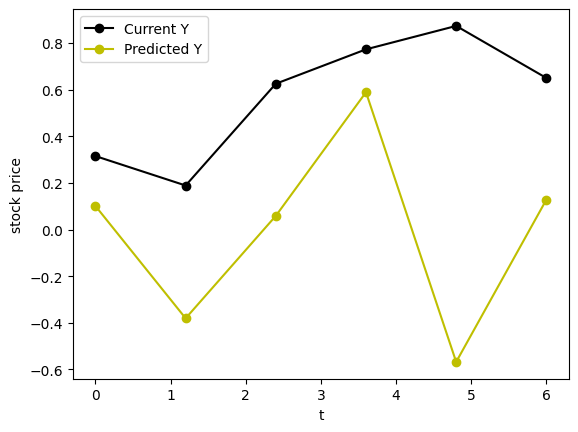

In [ ]:
def plot_linear2(ys):
  test_t=np.linspace(0, len(ys), len(ys))
  plt.plot(test_t, test_labels, color='k', marker='o', label='Current Y')
  plt.plot(test_t, ys, color='y', marker='o', label='Predicted Y')
  #plt.plot(test_t, test_features[test_features.columns[0]], color='b', marker='o', label='X')
  plt.ylabel('stock price')
  plt.xlabel('t')
  plt.legend()
plot_linear2(ys)

In [ ]:
ys*1191+15459

In [ ]:
data2